## WNBA Dataset

[Kaggle](https://www.kaggle.com/datasets/jinxbe/wnba-player-stats-2017?datasetId=2205&sortBy=dateRun&tab=bookmarked)

In [1]:
import pandas as pd
wnba = pd.read_csv('/Users/brindhamanivannan/Desktop/data-projects/datasets/wnba.csv')
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [2]:
wnba[['Name', 'Experience']]

,Name,Experience
0,Aerial Powers,2
1,Alana Beard,12
2,Alex Bentley,4
3,Alex Montgomery,6
4,Alexis Jones,R
...,...,...
138,Tiffany Hayes,6
139,Tiffany Jackson,9
140,Tiffany Mitchell,2
141,Tina Charles,8


In [3]:
wnba['Experience'].value_counts()

R     23
3     19
6     14
5     14
1     12
9     11
4     11
2     11
10     5
11     4
7      4
12     4
14     3
8      3
13     3
15     2
Name: Experience, dtype: int64

In [4]:
wnba['Experience'].replace({"R": "0"}, inplace=True)

In [5]:
wnba['Experience'].value_counts()

0     23
3     19
6     14
5     14
1     12
9     11
4     11
2     11
10     5
11     4
7      4
12     4
14     3
8      3
13     3
15     2
Name: Experience, dtype: int64

In [6]:
wnba['Experience'] = pd.to_numeric(wnba['Experience'])

In [7]:
wnba['Experience']

0       2
1      12
2       4
3       6
4       0
       ..
138     6
139     9
140     2
141     8
142     2
Name: Experience, Length: 143, dtype: int64

In [8]:
def make_exp_ordinal(row):
    if row['Experience'] <= 0:
        return 'Rookie'
    if (1 <= row['Experience'] <= 3):
        return 'Little experience'
    if (4 <= row['Experience'] <= 5):
        return 'Experienced'
    if (5 <= row['Experience'] <= 10):
        return 'Very experienced'
    if row['Experience'] > 10:
        return 'Veteran'
    
wnba['Exp_ordinal'] = wnba.apply(make_exp_ordinal, axis = 1) # new column

In [9]:
wnba['Exp_ordinal'].value_counts()

Little experience    42
Very experienced     37
Experienced          25
Rookie               23
Veteran              16
Name: Exp_ordinal, dtype: int64

## Comparing frequency distributions

In [10]:
rookies = wnba[wnba['Exp_ordinal'] == 'Rookie']
little_xp = wnba[wnba['Exp_ordinal'] == 'Little experience']
experienced = wnba[wnba['Exp_ordinal'] == 'Experienced']
very_xp = wnba[wnba['Exp_ordinal'] == 'Very experienced']
veterans =  wnba[wnba['Exp_ordinal'] == 'Veteran']
rookie_distro = rookies['Pos'].value_counts()
little_xp_distro = little_xp['Pos'].value_counts()
experienced_distro = experienced['Pos'].value_counts()
very_xp_distro = very_xp['Pos'].value_counts()
veteran_distro = veterans['Pos'].value_counts()

print(rookie_distro, '\n\n', little_xp_distro, '\n\n', experienced_distro, '\n\n',
      very_xp_distro, '\n\n', veteran_distro)

G      14
F       4
C       4
F/C     1
Name: Pos, dtype: int64 

 G      14
F      13
C       8
F/C     4
G/F     3
Name: Pos, dtype: int64 

 G      9
F      6
C      6
G/F    2
F/C    2
Name: Pos, dtype: int64 

 G      16
F       6
C       6
G/F     5
F/C     4
Name: Pos, dtype: int64 

 G      7
F      4
G/F    3
F/C    1
C      1
Name: Pos, dtype: int64


## Grouped bar plots

<AxesSubplot:xlabel='Exp_ordinal', ylabel='count'>

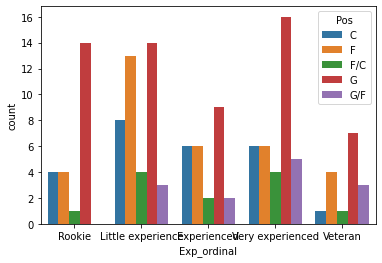

In [11]:
import seaborn as sns
sns.countplot(x = 'Exp_ordinal', hue = 'Pos', data = wnba,
              order = ['Rookie', 'Little experience', 'Experienced', 'Very experienced', 'Veteran'],
              hue_order = ['C', 'F', 'F/C', 'G', 'G/F']
             )

## Do Older Players Play Less?

In [12]:
print(wnba['MIN'].mean())

496.97202797202794


On average, a WNBA player played approximately 497 minutes in the 2016-2017 season.

In [14]:
print(wnba['Age'].mean())

27.076923076923077


Let's hypothesize that older players generally play less than this average of 497 minutes, while younger players generally play more. As a benchmark to distinguish between younger and older players, we'll take the mean age of players in our sample, which is approximately 27.

In [15]:
# An ordinal variable which labels each player as "young" or "old". 
# If the player is 27 or over, we'll label her "old", otherwise the label is "young".


wnba['age_mean_relative'] = wnba['Age'].apply(lambda x: 'old' if x >= 27 else 'young')
wnba['age_mean_relative']

0      young
1        old
2      young
3        old
4      young
       ...  
138      old
139      old
140      old
141      old
142      old
Name: age_mean_relative, Length: 143, dtype: object

In [16]:
# An ordinal variable which describes whether the minutes played is below or above average (or equal to the average). 
# If a player played 497 minutes or more, we'll assign her the label "average or above", otherwise we'll assign "below average".

wnba['min_mean_relative'] = wnba['MIN'].apply(lambda x: 'average or above' if x >= 497 else
                                           'below average')
wnba['min_mean_relative']

0         below average
1      average or above
2      average or above
3      average or above
4         below average
             ...       
138    average or above
139       below average
140    average or above
141    average or above
142       below average
Name: min_mean_relative, Length: 143, dtype: object

In [18]:
wnba[['Name', 'Age', 'age_mean_relative', 'MIN', 'min_mean_relative']]

,Name,Age,age_mean_relative,MIN,min_mean_relative
0,Aerial Powers,23,young,173,below average
1,Alana Beard,35,old,947,average or above
2,Alex Bentley,26,young,617,average or above
3,Alex Montgomery,28,old,721,average or above
4,Alexis Jones,23,young,137,below average
...,...,...,...,...,...
138,Tiffany Hayes,27,old,861,average or above
139,Tiffany Jackson,32,old,127,below average
140,Tiffany Mitchell,32,old,671,average or above
141,Tina Charles,29,old,952,average or above


<AxesSubplot:xlabel='age_mean_relative', ylabel='count'>

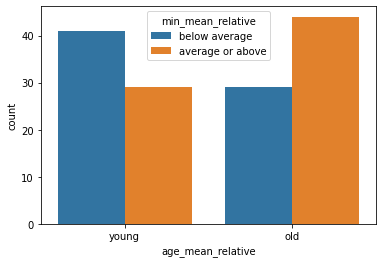

In [19]:
# Generate a grouped bar plot
sns.countplot(x = 'age_mean_relative', hue = 'min_mean_relative', data = wnba)


Do Older Players Play Less? NO

The grouped bar plot we built showed that among old players the "average or above" category is the most numerous.
A shortcoming of our analysis so far is that the min_mean_relative variable doesn't show much granularity. We can see that more old players belong to the "average or above" category than to "below average", but we can't tell, for instance, whether old players generally play much more than the average. For all we know, they could have all played exactly 497 minutes (which is the average).

The min_mean_relative variable is ordinal, and it was derived from the MIN variable, which is measured on a ratio scale. The information provided by the MIN variable is much more granular, and we can plot the distribution of this variable instead. Because the MIN variable is measured on a ratio scale, we'll need to use histograms instead of bar plots.

## Comparing histograms

The easiest way to compare two histograms is to superimpose one on top of the other.

<AxesSubplot:ylabel='Frequency'>

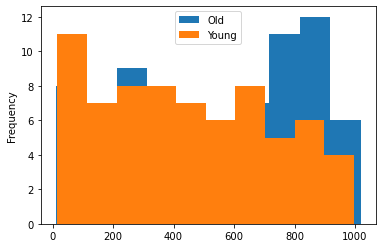

In [20]:
wnba[wnba.Age >= 27]['MIN'].plot.hist(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.hist(label = 'Young', legend = True)

<AxesSubplot:ylabel='Frequency'>

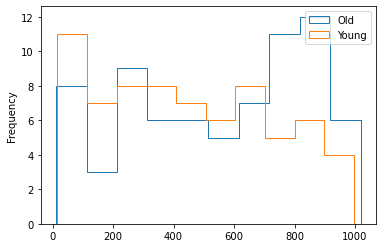

In [22]:
wnba[wnba.Age >= 27]['MIN'].plot.hist(histtype = 'step', label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.hist(histtype = 'step', label = 'Young', legend = True)

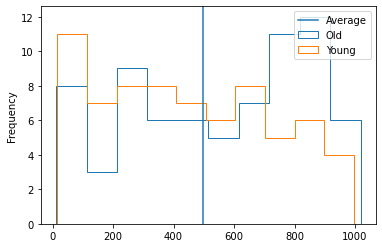

In [23]:
# Using the plt.axvline() function, add a vertical line to demarcate the average point

import matplotlib.pyplot as plt
wnba[wnba.Age >= 27]['MIN'].plot.hist(histtype = 'step', label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.hist(histtype = 'step', label = 'Young', legend = True)
plt.axvline(497, label = 'Average')
plt.legend()
plt.show()

## Kernel density estimate plots

The graph looked a bit overcrowded though, and the legend was not ideally positioned.
One solution to this problem is to smooth out the shape of the histograms to make them look less dense on the graph. Use Series.plot.kde() function.

<AxesSubplot:ylabel='Density'>

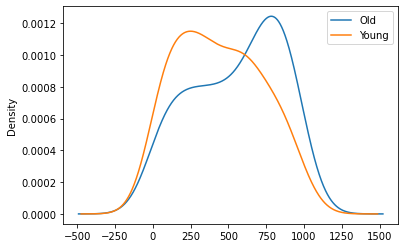

In [24]:
wnba[wnba.Age >= 27]['MIN'].plot.kde(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.kde(label = 'Young', legend = True)

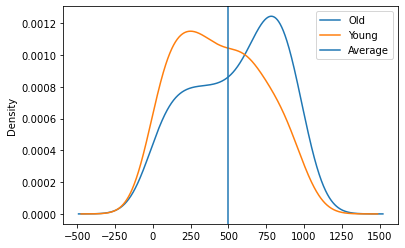

'We can still observe that most of the old players that belong to the "average or above"\ncategory play significantly more than average. With the help of the vertical line, the pattern\nis very easy to notice. Because the graph looks much cleaner than the one with step-type\nhistograms, we can easily argue that the pattern is much more obvious in the case of kernel density\nplots.'

In [25]:
wnba[wnba.Age >= 27]['MIN'].plot.kde(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.kde(label = 'Young', legend = True)
plt.axvline(497, label = 'Average')
plt.legend()
plt.show()

'''We can still observe that most of the old players that belong to the "average or above"
category play significantly more than average. With the help of the vertical line, the pattern
is very easy to notice. Because the graph looks much cleaner than the one with step-type
histograms, we can easily argue that the pattern is much more obvious in the case of kernel density
plots.'''

## Drawbacks of Kernel Density Plots

Grouped bar plots are ideal for variables measured on nominal and ordinal scales. For variables measured on a ratio or interval scale, kernel density plots are a good solution when we have many distributions to compare. However, kernel density plots tend to become unreadable as we reach five distributions or more.

<AxesSubplot:ylabel='Density'>

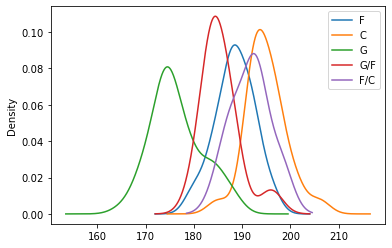

In [26]:
# segment the dataset by player position, and for each segment generate a kernel density plot

wnba[wnba.Pos == 'F']['Height'].plot.kde(label = 'F', legend = True)
wnba[wnba.Pos == 'C']['Height'].plot.kde(label = 'C', legend = True)
wnba[wnba.Pos == 'G']['Height'].plot.kde(label = 'G', legend = True)
wnba[wnba.Pos == 'G/F']['Height'].plot.kde(label = 'G/F', legend = True)
wnba[wnba.Pos == 'F/C']['Height'].plot.kde(label = 'F/C', legend = True)

Patterns:
    
- the shortest players are generally guards, 
- the tallest players are generally centers, 
- mid-height players are generally forwards or play in a combined position

Having to look very closely to a graph to identify obvious patterns is far from ideal. If there's any pattern, we want to see it immediately. To overcome this problem, we can use other kinds of graphs, which present the same information in a more readable way.

## Alternatives -  Strip plots, Box plots

<AxesSubplot:xlabel='Pos', ylabel='Height'>

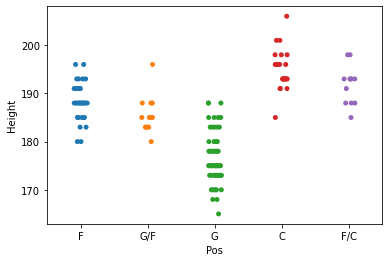

In [27]:
# the distribution of heights as a function of player position
sns.stripplot(x = 'Pos', y = 'Height', data = wnba)

Patterns are now immediately visible. 

- the shortest players are guards — in fact, all players under 180 cm are guards. 
- the tallest players are centers — this is the only category with players above 2 meters. 
- F/C has slightly taller representatives — most likely because it requires center qualities
- the tallest players are generally centers

<AxesSubplot:xlabel='Pos', ylabel='Height'>

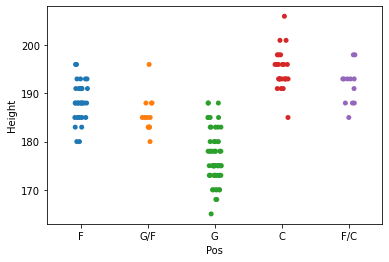

In [28]:
sns.stripplot(x = 'Pos', y = 'Height', data = wnba, jitter = True) # to avoid bullet points overlap

In fact, strip plots are actually scatter plots. When one of the variables is nominal or ordinal, a scatter plot will generally take the form of a series of narrow strips (the number of narrow strips will be the same as the number of unique values in the nominal or ordinal variable).

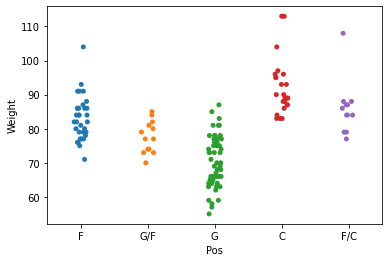

In [30]:
sns.stripplot(x = 'Pos' , y = 'Weight', data = wnba, jitter = True)
plt.show()

Yes, the distributions of the Height variable is very similar to the distributions of the Weight variable. This means that Height and Weight are correlated. Taller the player, the heavier she is; the shorter the player, the lighter she is.

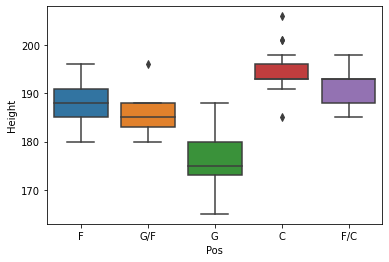

In [31]:
sns.boxplot(x = 'Pos', y = 'Height', data = wnba)
plt.show()

Let's isolate the height distribution of guards and understand it by comparing it with a histogram showing the same distribution:

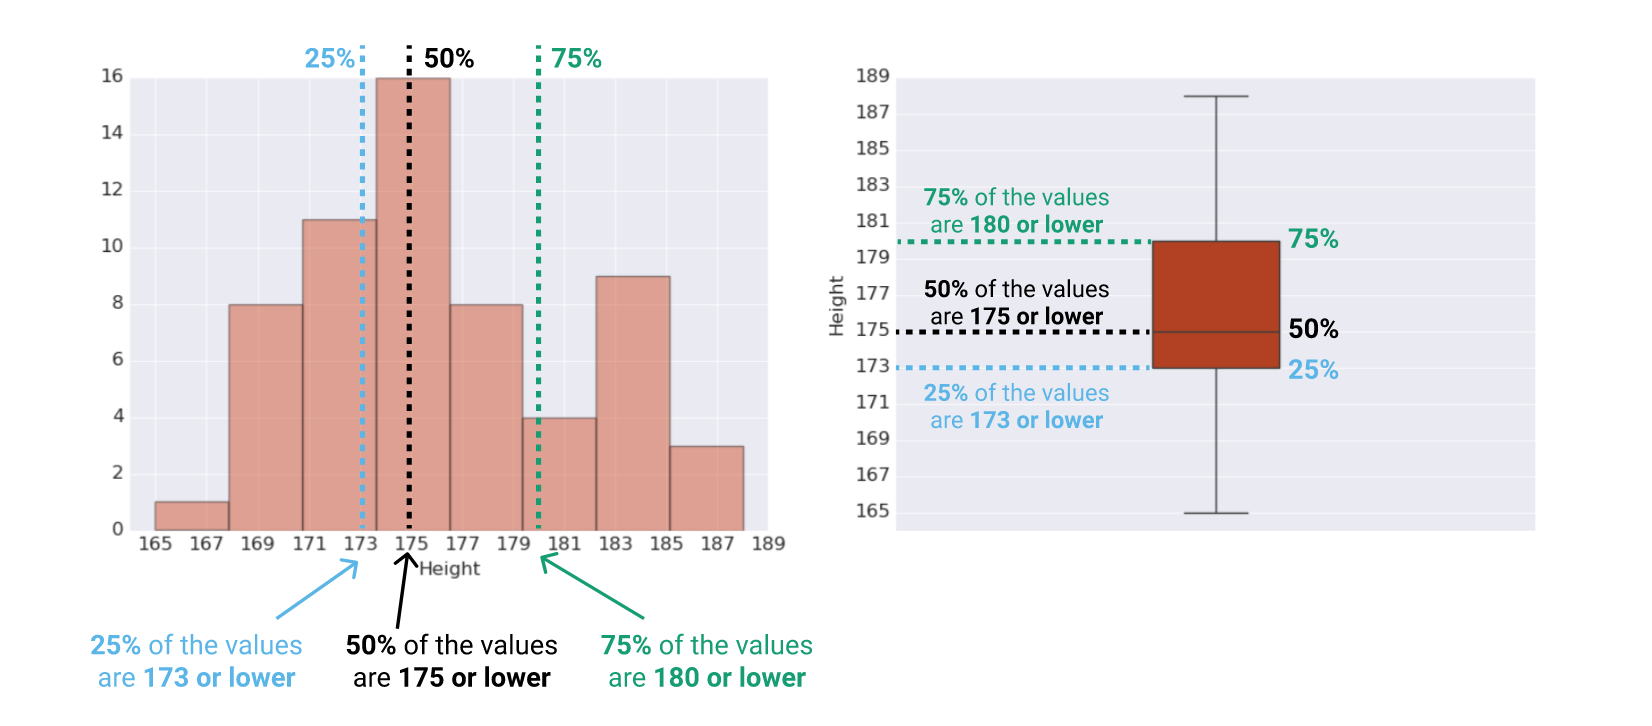

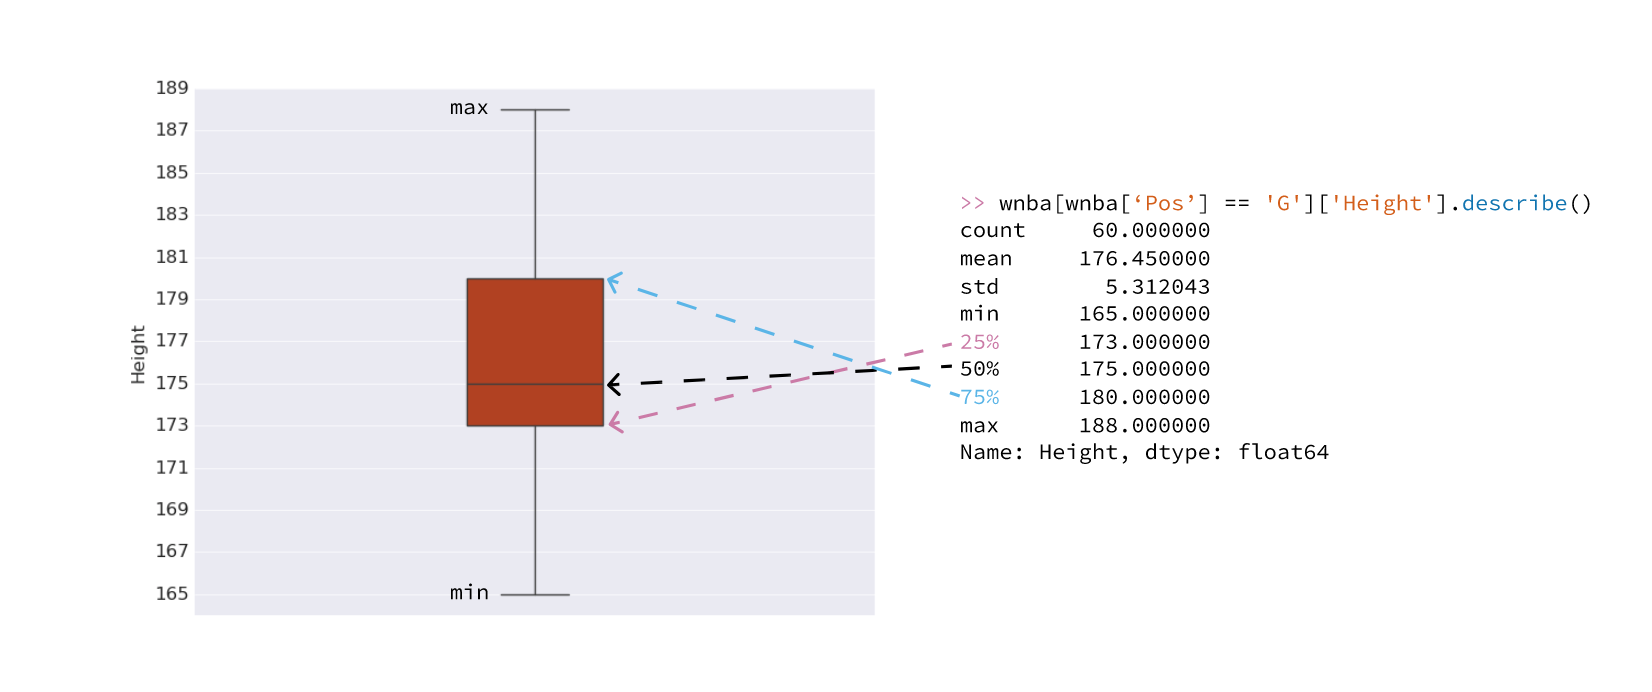

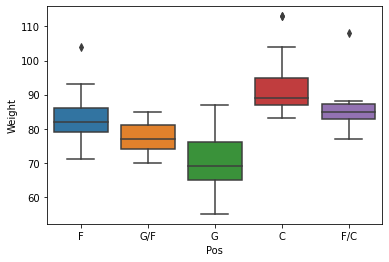

In [29]:
sns.boxplot(x = 'Pos', y = 'Weight', data = wnba)
plt.show()

This box plot shows the range of the distribution and its three quartiles (the 25th, the 50th and the 75th percentile). This allows us to get a good visual intuition about the proportion of values that fall under a certain quartile, between any two quartiles, or between a quartile and the minimum or the maximum value in the distribution.

## Outliers

The few dots we see for the box plots of centers and guards/forwards (G/F) represent values in the distribution that are much larger or much lower than the rest of the values. A value that is much lower or much larger than the rest of the values in a distribution is called an outlier.

A value is an outlier if:

- It's larger than the upper quartile by 1.5 times the difference between the upper quartile and the lower quartile (the difference is also called the interquartile range).
- It's lower than the lower quartile by 1.5 times the difference between the upper quartile and the lower quartile (the difference is also called the interquartile range).

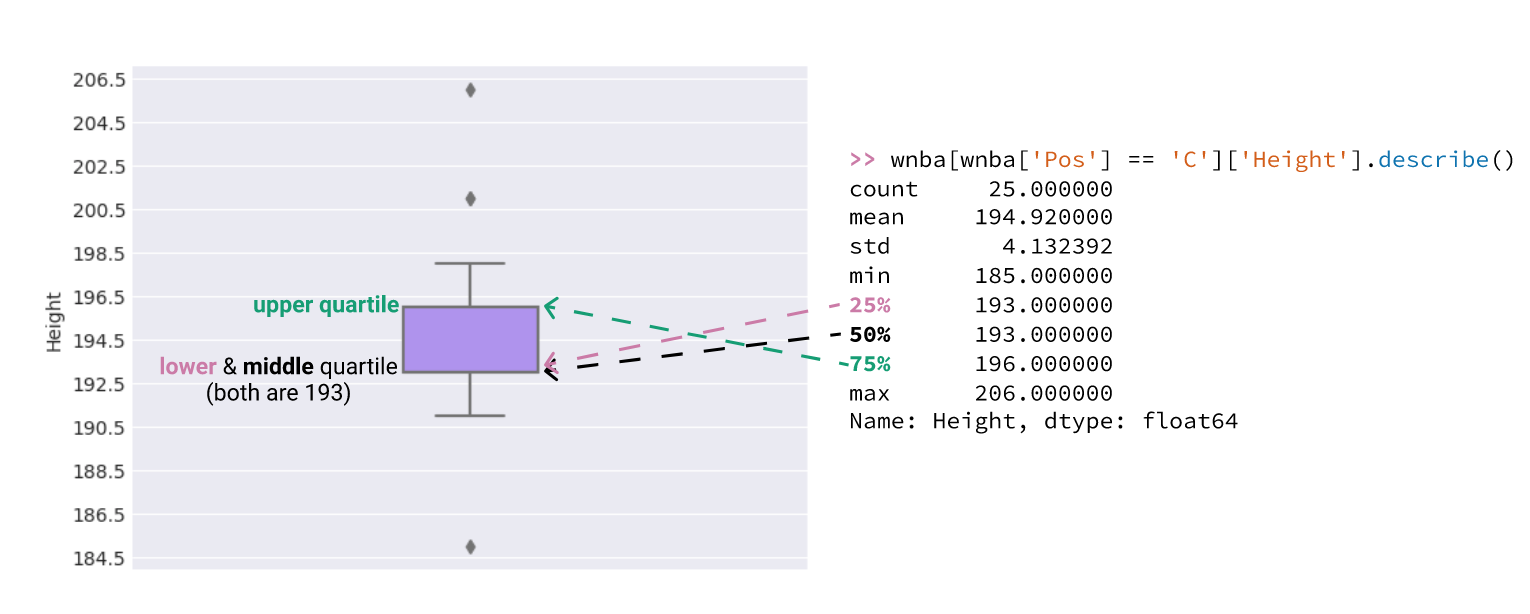

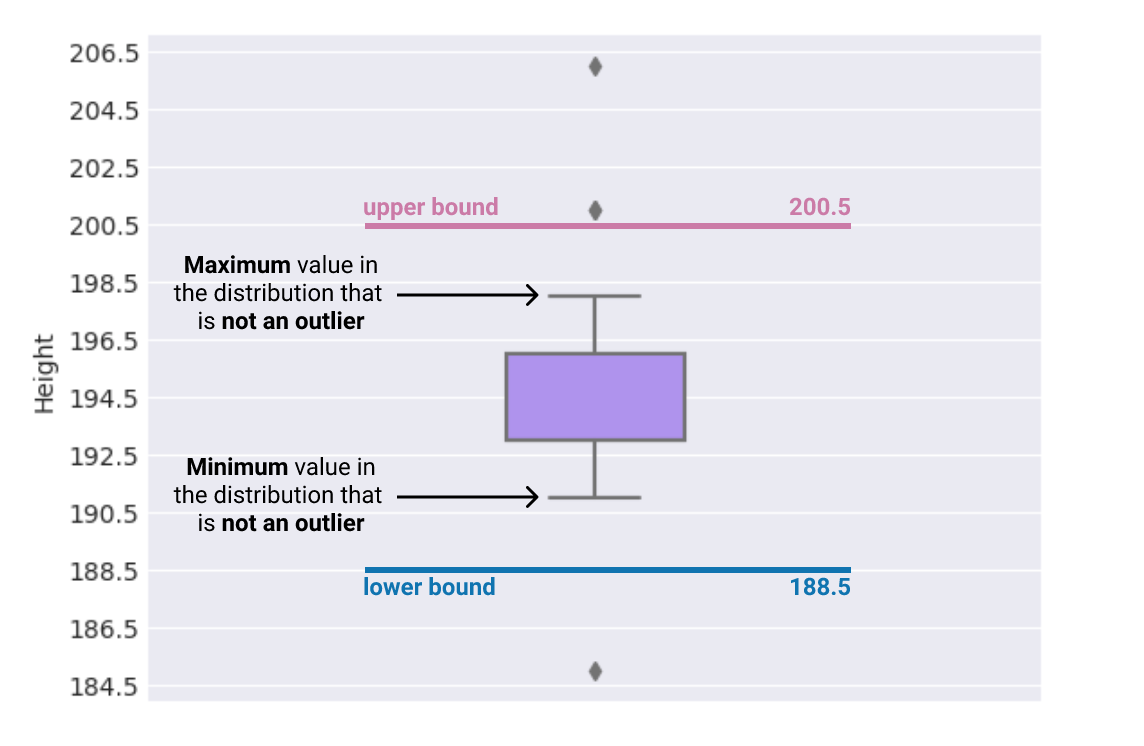

/Users/brindhamanivannan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


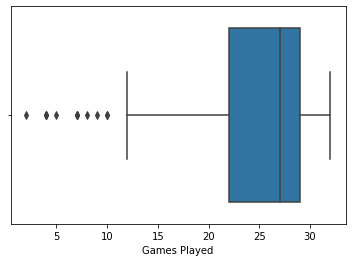

In [32]:
# interquartile range = upper quartile - lower quartile

iqr = 29 - 22
lower_bound = 22 - (1.5 * iqr)
upper_bound = 29 + (1.5 * iqr)

# Find how many values in the distribution are outliers

outliers_low = sum(wnba['Games Played'] < lower_bound) # True values will count as 1 in the summation
outliers_high = sum(wnba['Games Played'] > upper_bound)

sns.boxplot(wnba['Games Played'])
plt.show()

In [33]:
outliers_high

0

In [34]:
outliers_low

12

Now, we know how to compare frequency distributions using graphs. Grouped bar plots are ideal to compare the frequency distributions of nominal or ordinal variables. For variables measured on an interval or ratio scale, we can use step-type histograms, kernel density plots, or, for better readability, strip plots or box plots.